In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
all_matched = pd.read_csv("../psrc_lists/all_matched.csv")
f_all_matched = all_matched.loc[(all_matched["theta_1"]==2.0)&(all_matched["theta_2"]==6.0)]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (37,64,73,100,127,128,136,137,138,146,173,194,198,210,237,246,249,250,560,587,596,612,613,680,707,726,739,825) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
cats = ["_vlass","_first","_gleam","_tgss","_lotss","_2mass","_wise"]
count = []
for i in range(len(cats)):
    lab = "cluster"+cats[i]
    c = len(f_all_matched.dropna(subset=[lab]))
    count= np.append(count,c)

In [69]:
len(freqs)

29

In [70]:
len(cat_fluxes)

30

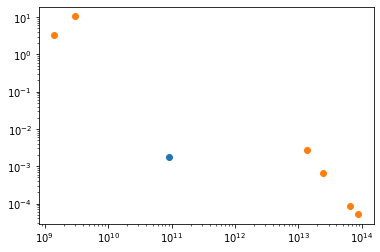

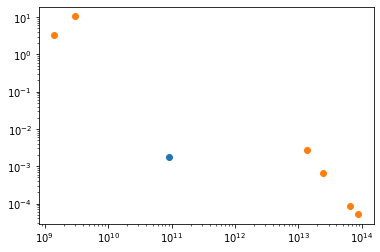

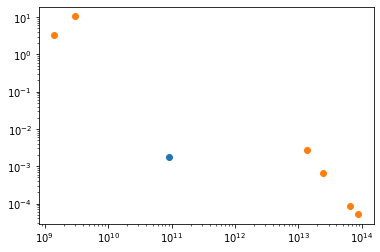

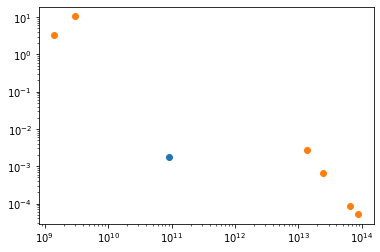

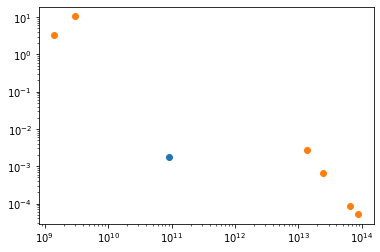

In [75]:
freqs = [3e9,1.4e9,76e6,84e6,92e6,99e6,107e6,115e6,122e6,130e6,143e6,151e6,158e6,166e6,174e6,181e6,189e6,197e6,204e6,212e6,220e6,150e6,144e6,2.4275e14,1.8038e14,1.3886e14,8.901e13,6.492e13,2.4813e13,1.3508e13]
for i in range(10):
    m2_flux = all_matched.iloc[i]["amp_fit"]
    cat_fluxes = np.array(list(all_matched.iloc[i][["Total_flux_vlass","FINT_first","int_flux_076_gleam","int_flux_084_gleam","int_flux_092_gleam","int_flux_099_gleam","int_flux_107_gleam","int_flux_115_gleam","int_flux_122_gleam","int_flux_130_gleam","int_flux_143_gleam","int_flux_151_gleam","int_flux_158_gleam","int_flux_166_gleam","int_flux_174_gleam","int_flux_181_gleam","int_flux_189_gleam","int_flux_197_gleam","int_flux_204_gleam","int_flux_212_gleam","int_flux_220_gleam","Total_flux_tgss","Total_flux_lotss","j_m_2mass","h_m_2mass","k_m_2mass","w1_flux_wise","w2_flux_wise","w3_flux_wise","w4_flux_wise"]]))
    if len(cat_fluxes) == np.sum(np.isnan(cat_fluxes)):
        pass
    else:
        fig = plt.figure()
        plt.scatter(90e9,m2_flux)
        plt.scatter(freqs,cat_fluxes)
        plt.xscale('log')
        plt.yscale('log')

In [60]:
a = np.array(list(all_matched.iloc[9][["cluster_wise","w3_flux_wise"]].values))

In [62]:
np.sum(np.isnan(a))

2

In [ ]:
m_vlass_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_vlass.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","RA","DEC","Total_flux","Peak_flux","Isl_Total_flux","Separation"]].add_suffix("_vlass")
m_first_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_first.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","RA","DEC","FPEAK","FINT","Separation"]].add_suffix("_first")
m_gleam_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_gleam.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","RAJ2000","DEJ2000","peak_flux_wide","int_flux_wide","peak_flux_076","int_flux_076","peak_flux_084","int_flux_084","peak_flux_092","int_flux_092","peak_flux_099","int_flux_099","peak_flux_107","int_flux_107","peak_flux_115","int_flux_115","peak_flux_122","int_flux_122","peak_flux_130","int_flux_130","peak_flux_143","int_flux_143","peak_flux_151","int_flux_151","peak_flux_158","int_flux_158","peak_flux_166","int_flux_166","peak_flux_174","int_flux_174","peak_flux_181","int_flux_181","peak_flux_189","int_flux_189","peak_flux_197","int_flux_197","peak_flux_204","int_flux_204","peak_flux_212","int_flux_212","peak_flux_220","int_flux_220","Separation"]].add_suffix("_gleam")
m_tgss_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_tgss.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","RA","DEC","Total_flux","Peak_flux","Separation"]].add_suffix("_tgss")
m_lotss_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_lotss.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","RA","DEC","Total_flux","Peak_flux","Separation"]].add_suffix("_lotss")
m_2mass_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_2mass.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","ra_01","dec_01","j_m","h_m","k_m","Separation"]].add_suffix("_2mass")
m_wise_9 = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_wise.csv")[["cluster","theta_1","theta_2","ra_deg","dec_deg","ra","dec","w1mpro","w2mpro","w3mpro","w4mpro","Separation"]].add_suffix("_wise")
tabs_list = [m_vlass_9,m_first_9,m_gleam_9,m_tgss_9,m_lotss_9,m_2mass_9,m_wise_9]
labels_list = ["VLASS","FIRST","GLEAM","TGSS","LOTSS","2MASS","WISE"]

In [ ]:
theta_1 = [2.0,3.0,4.0,5.0,6.0]
theta_2 = [3.0,4.0,5.0,6.0,7.0]
count_vlass=np.zeros((len(theta_1),len(theta_2)))
count_first=np.zeros((len(theta_1),len(theta_2)))
#tabs=[m_vlass,m_first]
for i in range(len(theta_1)):
    for j in range(len(theta_2)):
        count_vlass[i,j] = len(m_vlass_9.loc[(m_vlass_9["theta_1_vlass"]==theta_1[i])&(m_vlass_9["theta_2_vlass"]==theta_2[j])])
        count_first[i,j] = len(m_first_9.loc[(m_first_9["theta_1_first"]==theta_1[i])&(m_first_9["theta_2_first"]==theta_2[j])])